## Data Preprocessing

Explore the metadata file. Preprocess the dataset to be balanced (COVID-19 vs Healthy vs Symptomatic).

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
metadata = pd.read_csv('./coughvid_20211012/metadata_compiled.csv')

In [3]:
metadata = metadata[["uuid", "cough_detected","age","gender","status"]]

In [4]:
metadata = metadata.dropna()

In [5]:
# Filter the data with cough_detected below 0.9
metadata = metadata[(metadata['cough_detected']>=0.9)]

In [6]:
metadata

,uuid,cough_detected,age,gender,status
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,0.9609,15.0,male,healthy
4,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,0.9301,34.0,male,healthy
6,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,0.9968,21.0,male,healthy
13,00291cce-36a0-4a29-9e2d-c1d96ca17242,0.9883,15.0,male,healthy
14,0029d048-898a-4c70-89c7-0815cdcf7391,0.9456,35.0,male,symptomatic
...,...,...,...,...,...
34421,ffe0658f-bade-4654-ad79-40a468aabb03,0.9846,22.0,male,COVID-19
34422,ffe13fcf-c5c2-4a6a-a9fc-e010f4f033c1,0.9485,31.0,male,symptomatic
34425,ffedc843-bfc2-4ad6-a749-2bc86bdac84a,0.9498,23.0,male,healthy
34426,ffeea120-92a4-40f9-b692-c3865c7a983f,0.9784,22.0,female,healthy


In [7]:
# Divided the age into 4 groups: <=20, 20-40, 40-60, >60
def age_classify(age):
    if age <= 20:
        return "<=20"
    elif age <= 40:
        return "20-40"
    elif age <= 60:
        return "40-60"
    else:
        return ">60"
metadata["age"] = metadata["age"].map(age_classify)

<AxesSubplot:xlabel='status', ylabel='count'>

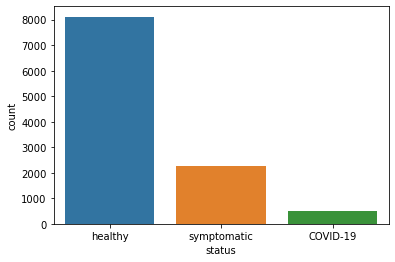

In [8]:
# As the original dataset is imbalanced, we have to make a more balanced dataset. 
sns.countplot(x=metadata["status"])

In [9]:
# balance the dataset
# randomly choose 519 from healthy and symptomatic
COVID_data = metadata[(metadata['status']=='COVID-19')]
sampleN = len(COVID_data)
healthy_data = metadata[(metadata['status']=='healthy')].sample(n=sampleN)
symptomatic_data = metadata[(metadata['status']=='symptomatic')].sample(n=sampleN)

In [10]:
COVID_data_train, COVID_data_test = train_test_split(COVID_data,test_size=0.1)
COVID_data_train, COVID_data_val = train_test_split(COVID_data_train,test_size=0.11)
healthy_data_train, healthy_data_test = train_test_split(healthy_data,test_size=0.1)
healthy_data_train, healthy_data_val = train_test_split(healthy_data_train,test_size=0.11)
symptomatic_data_train, symptomatic_data_test = train_test_split(symptomatic_data,test_size=0.1)
symptomatic_data_train, symptomatic_data_val = train_test_split(symptomatic_data_train,test_size=0.11)

In [14]:
metadata_balanced_train = pd.concat([COVID_data_train, healthy_data_train, symptomatic_data_train]).sample(frac=1)
metadata_balanced_train

,uuid,cough_detected,age,gender,status
9731,48012a40-d81e-45a6-a48c-3829cfa4cb02,0.9796,40-60,female,healthy
24947,b9e06a23-d76b-4164-b39a-64cd753a3c56,0.9940,40-60,female,COVID-19
26914,c87e1979-9259-4876-a5e0-318d27423f82,0.9151,20-40,male,healthy
23535,afab213c-22d5-476f-a97b-96b35c5db3ac,0.9886,20-40,female,symptomatic
15589,731cbe07-5754-46cf-bb5c-873a670cd5d7,0.9764,20-40,male,COVID-19
...,...,...,...,...,...
6469,304ace3b-e04a-4e5a-8738-a78808c2fda5,0.9948,<=20,male,healthy
3716,1b84e858-d85a-443b-8839-674426922147,0.9850,20-40,female,symptomatic
11955,58cb0acc-e886-4ead-8b88-fdb12059b5cc,0.9645,<=20,male,symptomatic
3931,1d3efa17-4f8b-48ef-9dd8-47ac6b0247f7,0.9907,20-40,male,healthy


In [15]:
metadata_balanced_val = pd.concat([COVID_data_val, healthy_data_val, symptomatic_data_val]).sample(frac=1)
metadata_balanced_val

,uuid,cough_detected,age,gender,status
27426,cc5b8aa6-355a-4f4c-bc88-4f1d5bafc5ad,0.9968,40-60,female,COVID-19
10734,4fa3ac8d-f252-40d6-bccd-24aa5e35556c,0.9437,40-60,male,COVID-19
22080,a49d942a-331a-49b5-b755-8659a12fac07,0.9954,<=20,female,COVID-19
20760,9a80a95e-6d74-4d45-bfd0-62c3eb40471a,0.9737,40-60,male,symptomatic
16386,795fa843-bdc4-418d-bef0-20c55c67ab4b,0.9457,40-60,female,healthy
...,...,...,...,...,...
23850,b1dea582-3eab-4dba-b8da-301009ae600b,0.9699,20-40,male,healthy
30671,e433d5e8-d327-4298-ae3c-a14de775e031,0.9631,<=20,male,symptomatic
32038,ee675fea-3d85-4c06-acec-3c69d26986e7,0.9871,40-60,male,COVID-19
19633,92307087-a106-4fd5-919a-a92b57ffd316,0.9974,40-60,male,COVID-19


In [16]:
metadata_balanced_test = pd.concat([COVID_data_test, healthy_data_test, symptomatic_data_test]).sample(frac=1)
metadata_balanced_test

,uuid,cough_detected,age,gender,status
29741,dd489c88-affc-4142-ac56-752c3a433991,0.9453,>60,male,COVID-19
23369,ae5dcf74-bf11-47a3-b0d6-c668a0794d8a,0.9210,20-40,male,COVID-19
25512,be166309-e053-4435-9095-f282c841bbdb,0.9401,40-60,male,healthy
33198,f6cf1903-b1a6-4420-9eb9-839f5dcadb44,0.9252,40-60,male,healthy
33261,f7380760-c4d0-4c8d-ac8a-fbbd838aaeb9,0.9962,20-40,female,symptomatic
...,...,...,...,...,...
27108,c9d68f80-c9ee-4cb3-885b-f4f46fa1c8bd,0.9406,>60,female,COVID-19
6025,2d0e2aae-1c8c-4353-933f-f8b15f304a39,0.9802,20-40,female,healthy
19368,9031d3b2-4019-403f-9c71-f387e6b60a82,0.9874,20-40,female,COVID-19
22923,ab0eaab9-6e82-4c5a-94f1-0bd73c6821c1,0.9449,40-60,male,healthy


<AxesSubplot:xlabel='age', ylabel='count'>

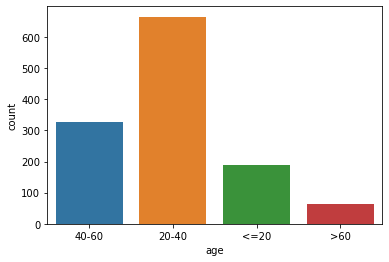

In [22]:
sns.countplot(x=metadata_balanced_train["age"])

<AxesSubplot:xlabel='age', ylabel='count'>

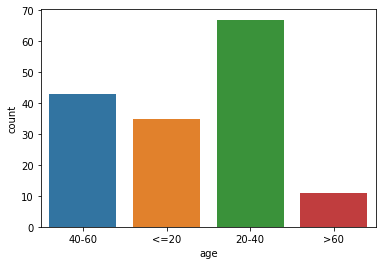

In [23]:
sns.countplot(x=metadata_balanced_val["age"])

<AxesSubplot:xlabel='age', ylabel='count'>

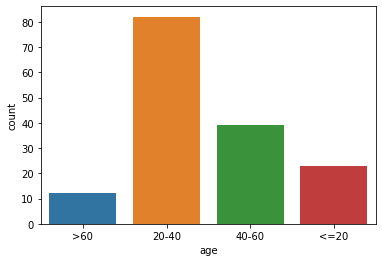

In [24]:
sns.countplot(x=metadata_balanced_test["age"])

<AxesSubplot:xlabel='age', ylabel='count'>

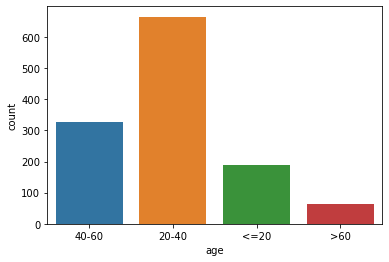

In [20]:
sns.countplot(x=metadata_balanced_train["age"])

<AxesSubplot:xlabel='gender', ylabel='count'>

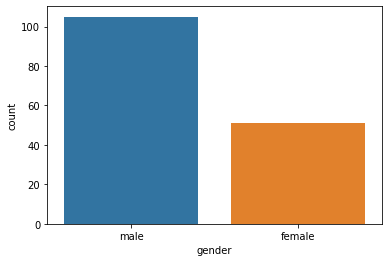

In [21]:
sns.countplot(x=metadata_balanced_test["gender"])

In [26]:
# save the new metadata file
metadata_balanced_train.to_csv('./coughvid_20211012/metadata_balanced_train.csv')
metadata_balanced_val.to_csv('./coughvid_20211012/metadata_balanced_val.csv')
metadata_balanced_test.to_csv('./coughvid_20211012/metadata_balanced_test.csv')  